# ANKIT KUMAR-Logistic Regression and k-Nearest Neighbors (k-NN) Classification with Bank Customer Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1: Logistic Regression
**1. Data Exploration:**
>**Load the dataset and inspect the first few rows.**

In [2]:
df=pd.read_csv(r'D:\Downloads\BankChurners.csv')

In [3]:
df.info()

print('\nshape\n',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


>**The distribution of the target variable Attrition_Flag (churn or not).**

<Axes: title={'center': 'Churn Distribution'}, xlabel='Attrition_Flag'>

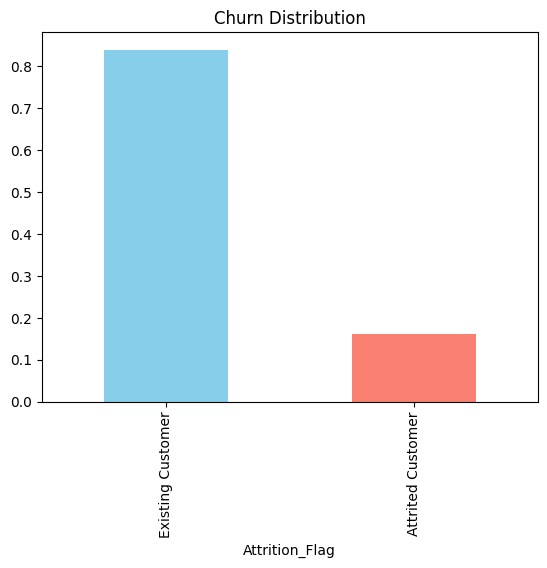

In [5]:
# Check class distribution of Attrition_Flag
df['Attrition_Flag'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'], title='Churn Distribution')


>**Summarize the numerical features and identify any potential outliers or anomalies.**

In [6]:
# Summary statistics
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


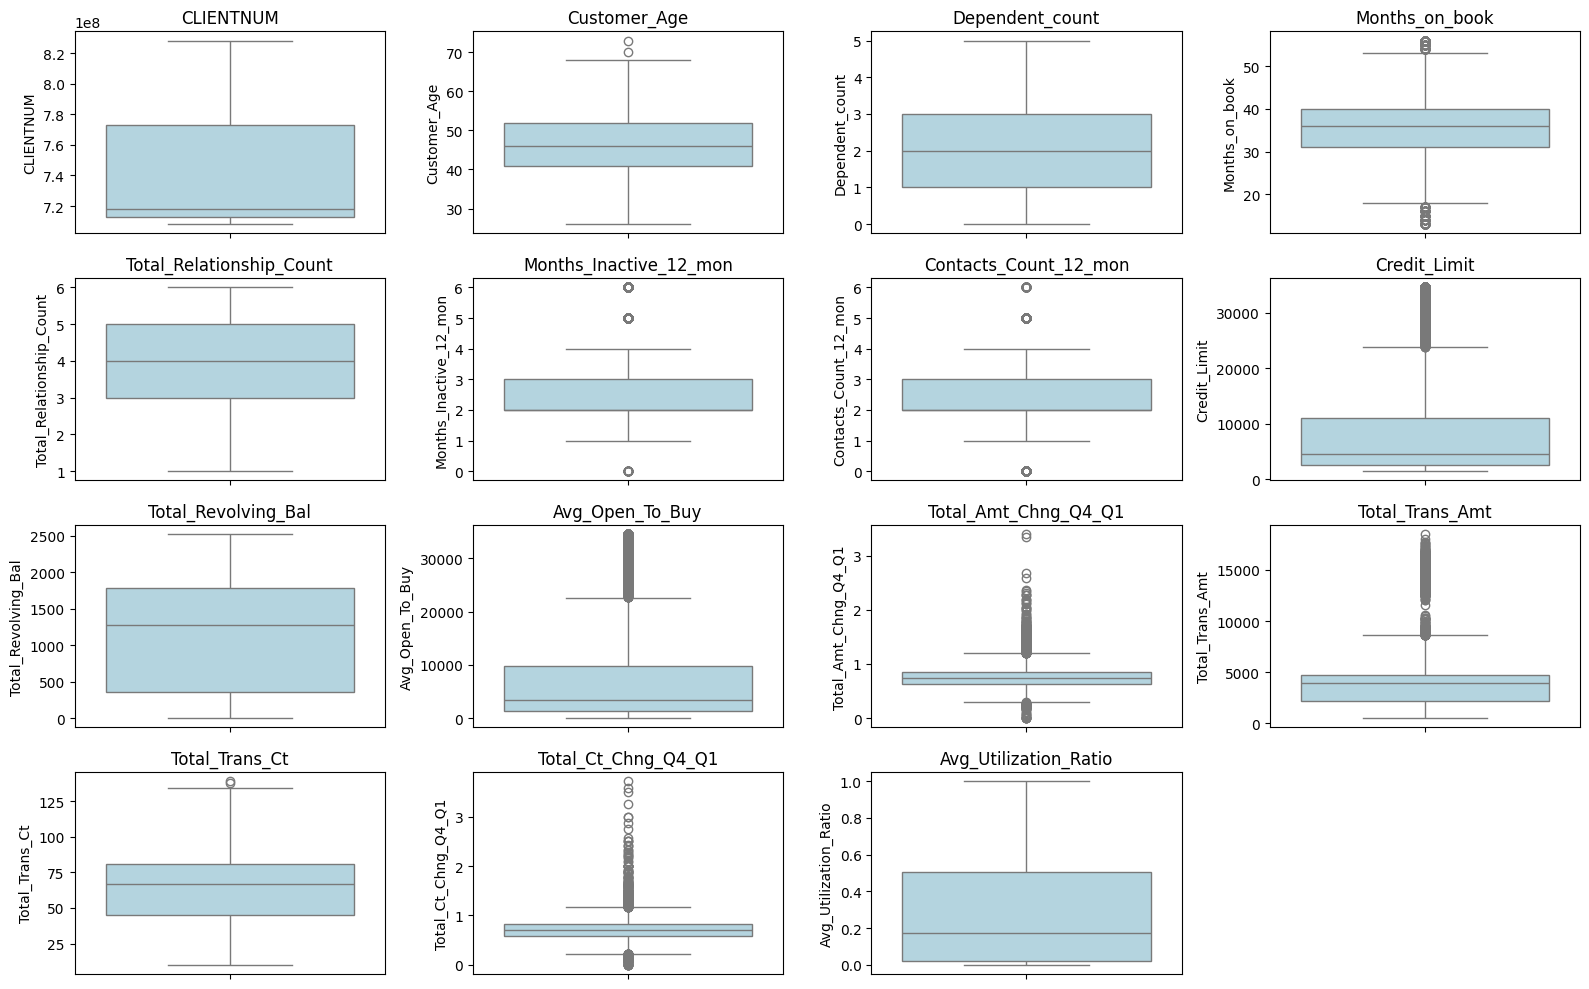

In [7]:
# Visualize potential outliers for numeric columns
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

**2. Data Preprocessing:**
>**Convert the Attrition_Flag column into a binary variable where 'Attrited Customer' is converted to 1 and 'Existing Customer' is converted to 0.**

In [8]:
# Convert target to binary: 1 = churned, 0 = existing
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)


>**Handle any missing values in the dataset, if present.**

In [9]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])


Missing values:
 Series([], dtype: int64)


In [10]:
df = df.drop(columns=['CLIENTNUM'])


>**Convert categorical variables into numerical values using one-hot encoding or label encoding.**

In [11]:
# Identify categorical columns
cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# One-hot encode
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


>**Normalize or standardize the numerical features to ensure that they are on the same scale.**

In [12]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

>**Split the data into training and testing sets with an 80-20 split.**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


**3. Model Training:**
>**Implement a Logistic Regression model using Scikit-learn.**

>**Train the model on the training data.**


In [14]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

**4. Prediction:**
>**Use the trained Logistic Regression model to predict whether a new customer will churn based on provided feature values.**

In [15]:
# Predict class labels (0 or 1)
y_pred = log_reg.predict(X_test)

# Predict probabilities (for confidence level)
y_proba = log_reg.predict_proba(X_test)


>**Evaluate the confidence level of the prediction and discuss any potential limitations.**

In [16]:
# Predict for a sample (let's say first record from X_test)
import numpy as np

sample = X_test[0].reshape(1, -1)
pred_class = log_reg.predict(sample)[0]
pred_proba = log_reg.predict_proba(sample)[0][pred_class]

print(f"Predicted class: {'Churn' if pred_class == 1 else 'No Churn'}")
print(f"Model confidence: {pred_proba * 100:.2f}%")


Predicted class: No Churn
Model confidence: 99.78%


It means the model is 99.78% confident the customer won't churn.
But this doesn’t guarantee accuracy — it’s just the model’s own certainty.

**Potential Limitations of Logistic Regression in This Use Case**


>Linearity Assumption-	Logistic regression assumes a linear relationship between input features and log-odds of the outcome. But churn behavior may be influenced by non-linear interactions.
>
>Class Imbalance-	If most customers are not churning (common in churn data), the model may be biased toward predicting “No Churn”. You’ll need metrics like precision, recall, and F1-score.
>
>Feature Interactions Ignored-	Logistic regression does not capture interactions between features unless you manually add them.
>
>Sensitive to Outliers-	A few extreme values can significantly skew the model’s understanding of churn risk.
>
>Limited Expressiveness-	More complex models (like Random Forest, XGBoost) might perform better when feature relationships are not obvious.

# Part 2: k-Nearest Neighbors (k-NN) Classification:

**1. Data Preprocessing:**


In [17]:
# Reuse standardized and encoded data from Part 1
# X_train, X_test, y_train, y_test are already ready from Logistic Regression
# If needed:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)


 **2. Model Training & Hyperparameter Tuning**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Find optimal k
best_k = k_range[accuracies.index(max(accuracies))]
print(f"Optimal k: {best_k} with accuracy: {max(accuracies):.4f}")


Optimal k: 7 with accuracy: 0.8741


**3. Comparison with Logistic Regression**

In [19]:
from sklearn.metrics import classification_report

# Best k-NN model
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

# Logistic Regression metrics
print("🔹 Logistic Regression:")
print(classification_report(y_test, log_reg.predict(X_test)))

# k-NN metrics
print("\n🔸 k-NN:")
print(classification_report(y_test, y_pred_knn))


🔹 Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.77      0.54      0.63       325

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.79      2026
weighted avg       0.89      0.90      0.89      2026


🔸 k-NN:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1701
           1       0.80      0.29      0.42       325

    accuracy                           0.87      2026
   macro avg       0.84      0.64      0.68      2026
weighted avg       0.87      0.87      0.85      2026



**4. Prediction & Confidence**

In [20]:
# Predict for a sample
sample = X_test[0].reshape(1, -1)
pred_class_knn = knn_best.predict(sample)[0]
pred_proba_knn = knn_best.predict_proba(sample)[0][pred_class_knn]

print(f"Prediction (k-NN): {'Churn' if pred_class_knn == 1 else 'No Churn'}")
print(f"Confidence: {pred_proba_knn * 100:.2f}%")


Prediction (k-NN): No Churn
Confidence: 100.00%


**Limitations of k-NN:**

Slower with large datasets.

Sensitive to irrelevant features.

Affected by noisy data or unbalanced classes.

**5. Visualization**

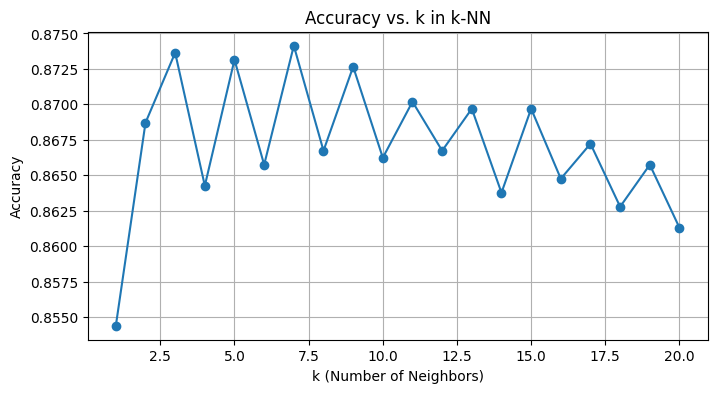

In [21]:
#Accuracy vs. k
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(k_range, accuracies, marker='o')
plt.title("Accuracy vs. k in k-NN")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


**Plot the decision boundary**

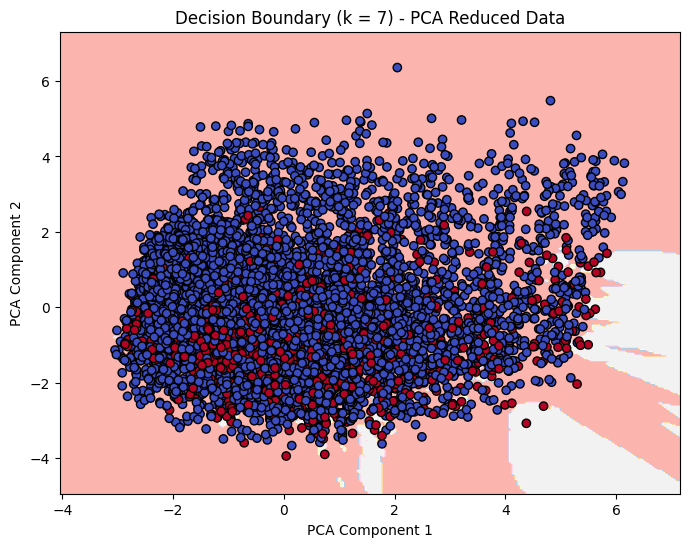

In [22]:
# Decision Boundary (using PCA)
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

knn_2D = KNeighborsClassifier(n_neighbors=best_k)
knn_2D.fit(X_train_2D, y_train)

# Plotting the boundary
h = 0.05
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title(f"Decision Boundary (k = {best_k}) - PCA Reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


# THE END